0.7854414458365176
Train Accuracy for rf : 1.0 

Test Accuracy for rf : 0.73789 

TrainS Accuracy for rf : 0.00379 

TestS Accuracy for rf : 0.00365 



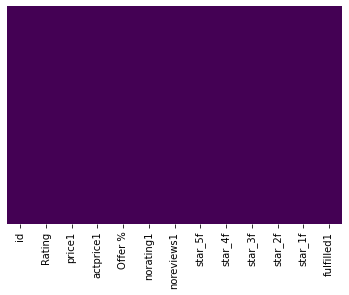

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd  
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder



from sklearn.metrics import confusion_matrix, plot_confusion_matrix,classification_report,accuracy_score,roc_auc_score,roc_curve

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import plot_tree, plot_importance
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV
    
# Importing the dataset  
df = pd.read_csv('train.csv')
df.drop(df.columns[1], axis=1, inplace=True)
df.drop(df.columns[2:4], axis=1, inplace=True)
df=df.dropna()
df1=df["Offer %"].str.replace("%","")
df1
df['Offer %'] = df1
df.isnull().sum()
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')


# test = pd.read_csv('test.csv')
# test.drop(X_test.columns[1], axis=1, inplace=True)
# test
# test.drop(X_test.columns[2:4], axis=1, inplace=True)
# test.head()

# sns.heatmap(X_test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

col_transform = [col for col in df.columns if col not in ['price1']]
X = df[col_transform]
y = df['price1']

# features = ['id', 'Rating', 'actprice1', 'norating1',
#        'noreviews1', 'star_5f', 'star_4f', 'star_3f', 'star_2f', 'star_1f',
#        'fulfilled1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)



# X_test['Rating'].fillna(X_test['Rating'].value_counts().index[0], inplace = True)
# X_test['star_5f'].fillna(X_test['star_5f'].value_counts().index[0], inplace = True)
# X_test['star_1f'].fillna(X_test['star_1f'].value_counts().index[0], inplace = True)
df['Rating'].fillna(df['Rating'].median(),inplace=True)
df['star_5f'].fillna(df['star_5f'].median(),inplace=True)
df['star_1f'].fillna(df['star_1f'].median(),inplace=True)

scaler=StandardScaler()
X_trainS=pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_testS=scaler.transform(X_test)




# model= DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=70,
#  max_features=None, max_leaf_nodes=None,
#   min_samples_leaf=1,
#  min_samples_split=2, min_weight_fraction_leaf=0.0,
#  random_state=1, splitter='best')
# Train Accuracy for rf : 1.0 

# Test Accuracy for rf : 0.82542 

# TrainS Accuracy for rf : 0.00033 

# TestS Accuracy for rf : 0.00033 
    


from sklearn.model_selection import StratifiedKFold
skfold=StratifiedKFold(n_splits=5)
model=DecisionTreeClassifier()
scores=cross_val_score(model,X,y,cv=skfold)
print(np.mean(scores))


model.fit(X_train,y_train)

pred_train=model.predict(X_train)
preds = model.predict(X_test)


accuracy_train = round(accuracy_score(y_train, pred_train), 5)
accuracy_test = round(accuracy_score(y_test, preds), 5)
print('Train Accuracy for rf',  ':', accuracy_train, '\n')
print('Test Accuracy for rf',  ':', accuracy_test, '\n')

pred_train=model.predict(X_trainS)
preds = model.predict(X_testS)
accuracy_train = round(accuracy_score(y_train, pred_train), 5)
accuracy_test = round(accuracy_score(y_test, preds), 5)
print('TrainS Accuracy for rf',  ':', accuracy_train, '\n')
print('TestS Accuracy for rf',  ':', accuracy_test, '\n')
    




# model= RandomForestClassifier(n_estimators=1100,max_depth=20,random_state=0)


# model= XGBClassifier(n_estimators=1000,learning_rate=0.01)

# model = XGBRFClassifier(n_estimators=1000, subsample=0.8, colsample_bynode=0.7)

 
  
  


# make predictions which we will submit. 


In [2]:
# output = pd.DataFrame({'prediction': y_test})

# output['prediction'] = output['prediction'].astype(int)
# output.to_csv('mysubmission1.csv', index=False)

In [3]:
# df = pd.read_csv('mysubmission1.csv')
# df

In [4]:
# df['prediction'].value_counts()

In [5]:
# df_pred = pd.DataFrame(preds, index=df_test.index, columns=['predictions'])
# df_pred

In [6]:
df.columns

Index(['id', 'Rating', 'price1', 'actprice1', 'Offer %', 'norating1',
       'noreviews1', 'star_5f', 'star_4f', 'star_3f', 'star_2f', 'star_1f',
       'fulfilled1'],
      dtype='object')